# Fitting with Numpy Arrays

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

sns.set_style("whitegrid")

In [2]:
X = pd.read_excel("./data/dataNumeric.xlsx", sheet_name="X", header=None).to_numpy()
X_train = pd.read_excel("./data/dataNumeric.xlsx", sheet_name="XTrain", header=None).to_numpy()
X_test = pd.read_excel("./data/dataNumeric.xlsx", sheet_name="XTest", header=None).to_numpy()
y = pd.read_excel("./data/dataNumeric.xlsx", sheet_name="y", header=None).to_numpy().flatten()
y_train = pd.read_excel("./data/dataNumeric.xlsx", sheet_name="yTrain", header=None).to_numpy().flatten()
y_test = pd.read_excel("./data/dataNumeric.xlsx", sheet_name="yTest", header=None).to_numpy().flatten()

The data set for this interaction is provided as numpy arrays rather than a DataFrame.
X is a matrix containing the values for predictor variables x1, x2, and x3, and y is a vector containing the response values.
The data set is divided into a training set, XTrain and yTrain, and a test set, XTest and yTest.

In [3]:
train_not_nan = np.where(~np.isnan(y_train))[0]

regressor = LinearRegression()
regressor.fit(X_train[train_not_nan, :], y_train[train_not_nan])

LinearRegression()

In [4]:
test_not_nan = np.where(~np.isnan(y_test))[0]

y_pred = regressor.predict(X_test[test_not_nan])
print("R^2:", regressor.score(X_test[test_not_nan], y_test[test_not_nan]))

R^2: 0.8361507204466263


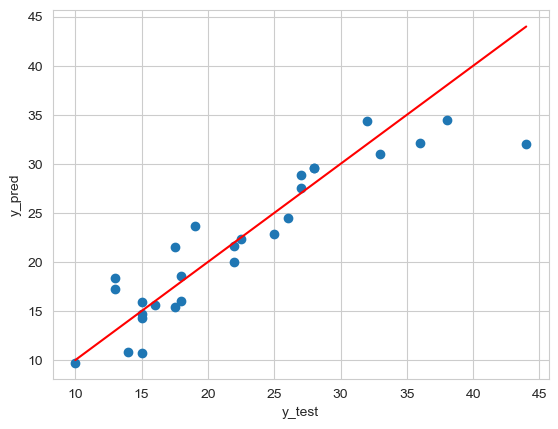

In [5]:
plt.figure()
plt.scatter(y_test[test_not_nan], y_pred)
plt.plot(y_test[test_not_nan], y_test[test_not_nan], color='r')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

When we provide training data as a numpy array, each column represents a term in the regression formula. This matrix is the design matrix.
For example, suppose X contains two columns with data for predictor variables x1 and x2. We can create a design matrix for a regression formula with terms x1, x2, and x2^2.

In [6]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out())
X_train_poly = X_train_poly[["1", "x0", "x2", "x0 x2"]].to_numpy()

In [7]:
regressor = LinearRegression()
regressor.fit(X_train_poly[train_not_nan, :], y_train[train_not_nan])

LinearRegression()

In [8]:
X_test_poly = poly.transform(X_test)
X_test_poly = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out())
X_test_poly = X_test_poly[["1", "x0", "x2", "x0 x2"]].to_numpy()

y_pred = regressor.predict(X_test_poly[test_not_nan])
print("R^2:", regressor.score(X_test_poly[test_not_nan], y_test[test_not_nan]))

R^2: 0.8702706036562857


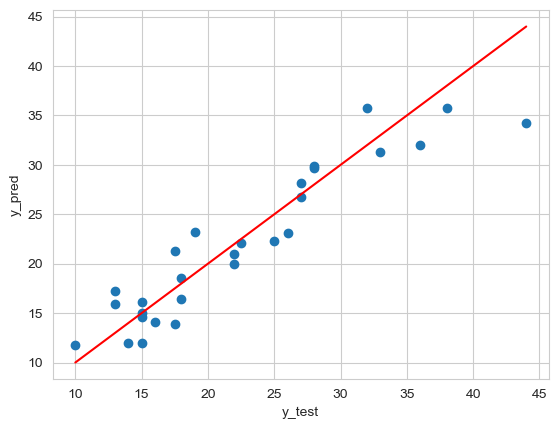

In [9]:
plt.figure()
plt.scatter(y_test[test_not_nan], y_pred)
plt.plot(y_test[test_not_nan], y_test[test_not_nan], color='r')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()